In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 什么是卷积

用从样本中所学习到的特征和原有图像做卷积，从而对原来图像上的统一位置获得一个不同特征的激活值。其数学本质是一个矩阵“翻转”（*许多机器学习库在实现的时候其实并没有翻转，称之为互相关函数，但是也叫做翻转，翻转的唯一目的是实现可交互性，但在神经网络中并不是一个重要的性质，我们大可以不去关注这个翻转*）后和另一个矩阵移位相乘。

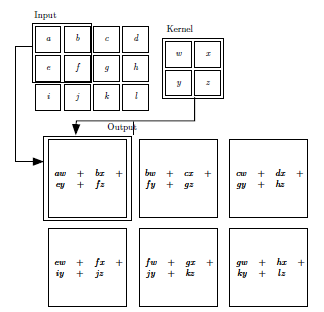

卷积运算的具体操作：

第一步
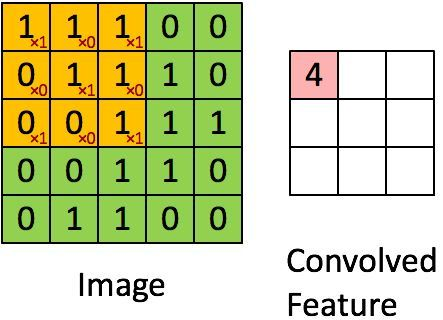

第二步：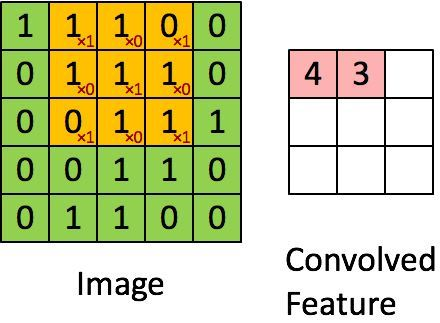

第三步：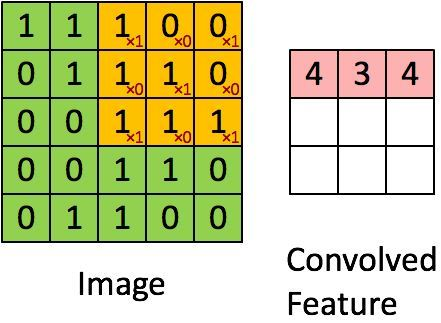

第四步：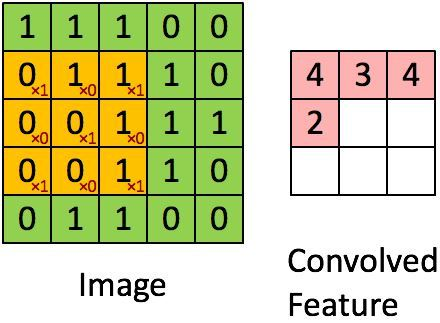

第九步：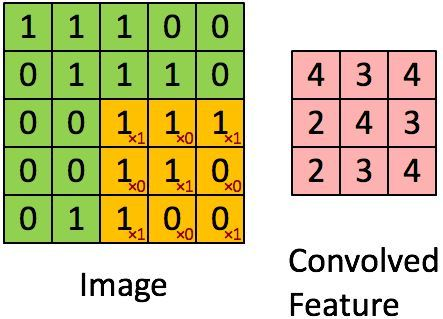

In [2]:
#代码示例
import tensorflow as tf
import numpy as np

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x = np.array([
    [[[1.0],[1.0],[1.0],[0.0],[0.0]],
     [[0.0],[1.0],[1.0],[1.0],[0.0]],
     [[0.0],[0.0],[1.0],[1.0],[1.0]],
     [[0.0],[0.0],[1.0],[1.0],[0.0]],
     [[0.0],[1.0],[1.0],[0.0],[0.0]]]
])

w = np.array([[[[1.0]], [[0.0]], [[1.0]]],
              [[[0.0]], [[1.0]], [[0.0]]],
              [[[1.0]], [[0.0]], [[1.0]]]
             ])

In [4]:
x.shape,w.shape

((1, 5, 5, 1), (3, 3, 1, 1))

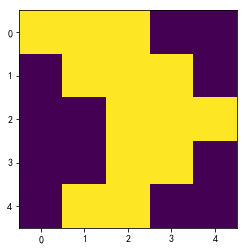

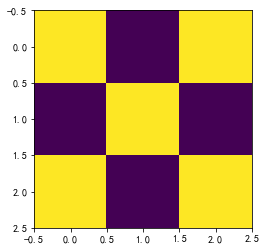

In [5]:
# 绘制图像查看形状
plt.imshow(x[0].reshape([5,5]))
plt.show()
plt.imshow(w.reshape([3,3]))
plt.show()

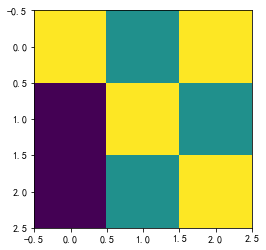

(1, 3, 3, 1)

In [15]:
with tf.Session() as sess:
    res = sess.run(tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="VALID"))
plt.imshow(res.reshape([3,3]))
plt.show()
res.shape

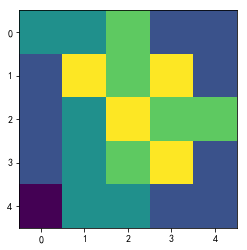

(1, 5, 5, 1)

In [25]:
with tf.Session() as sess:
    res = sess.run(tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="SAME"))
plt.imshow(res.reshape([5,5]))
plt.show()
res.shape

# 卷积运算的动机

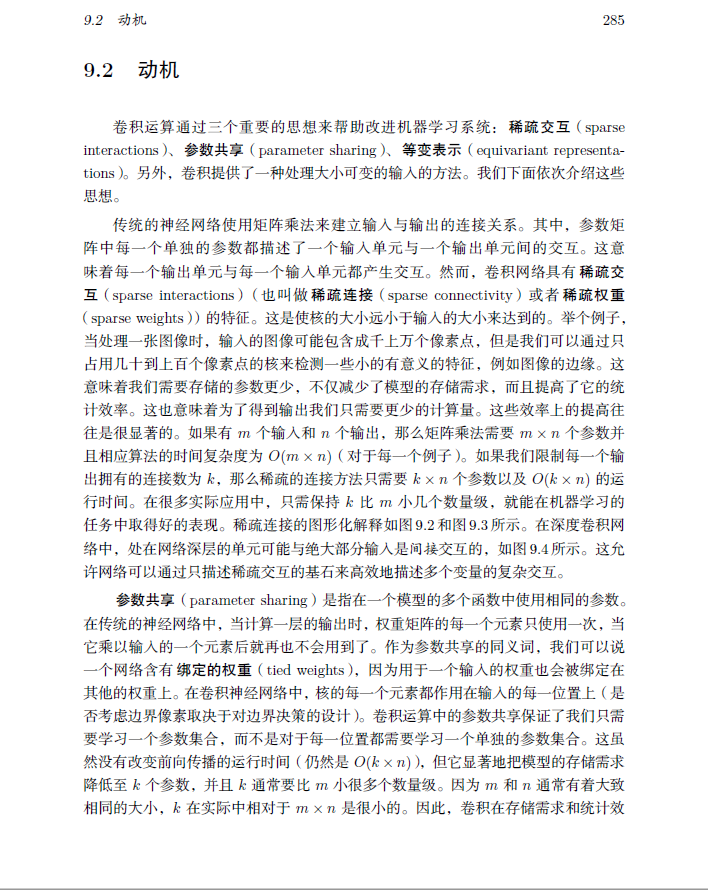

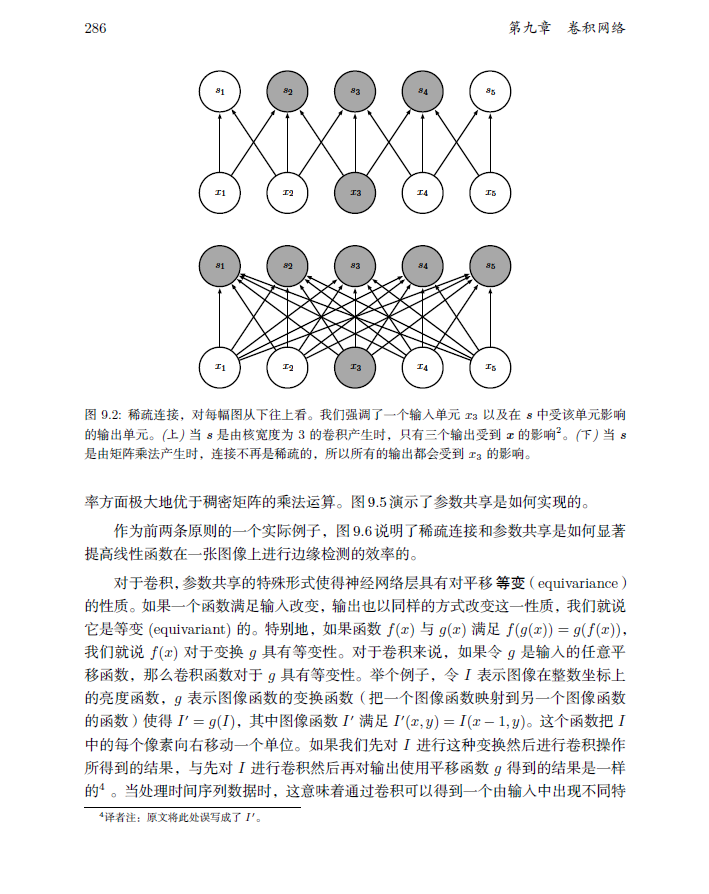

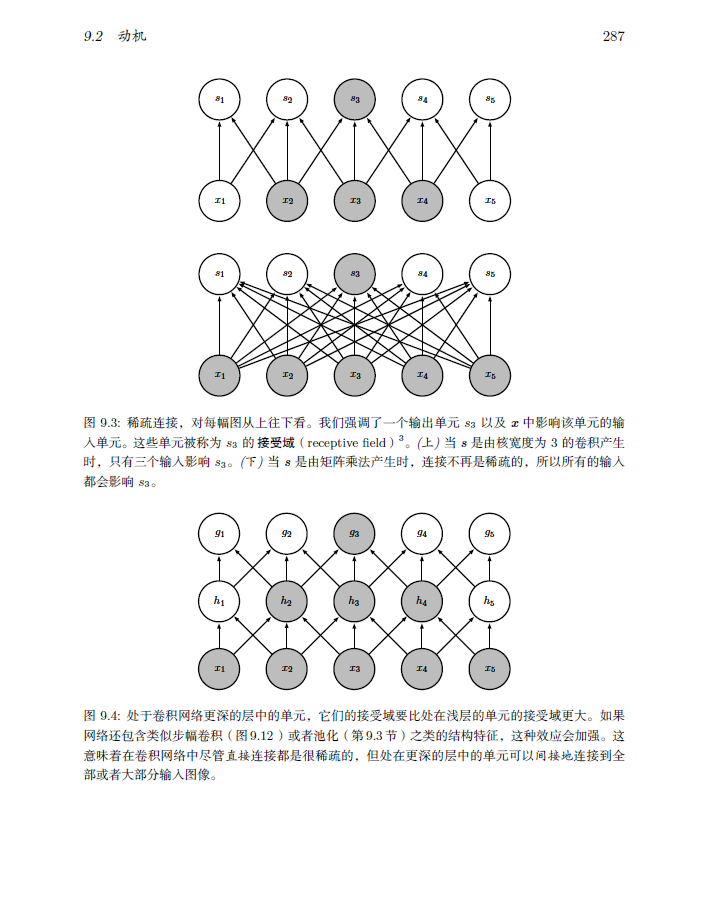

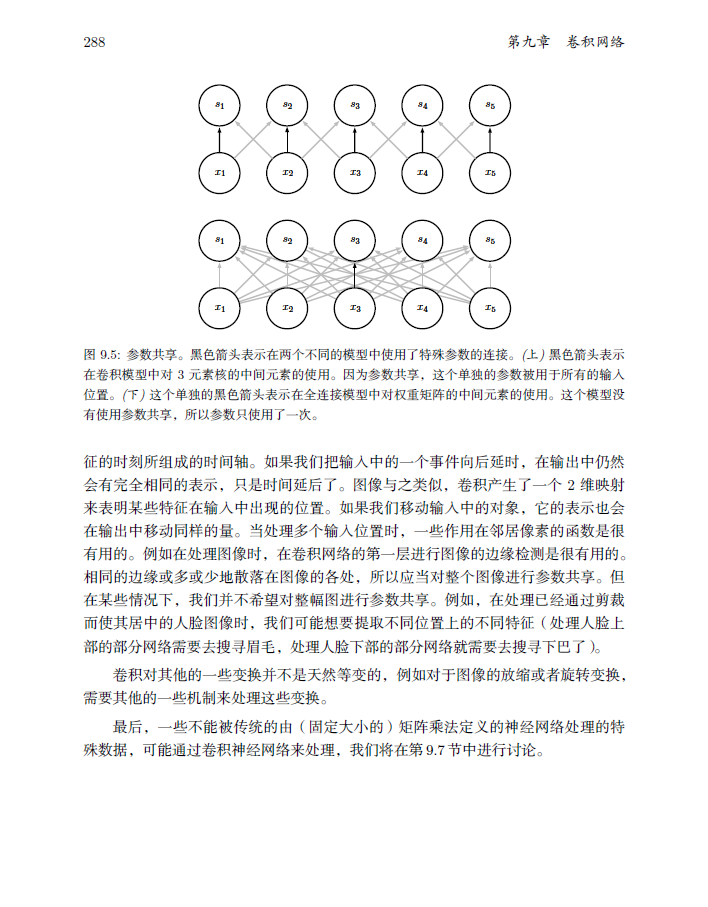

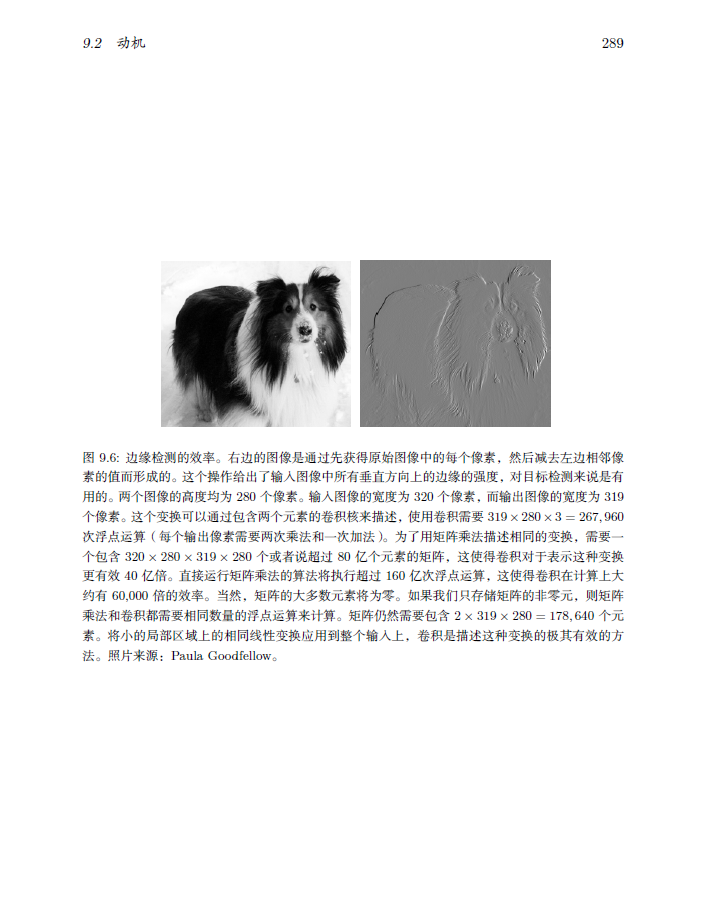

# 激活函数-整流线型单元Relu

# 池化-Pooling

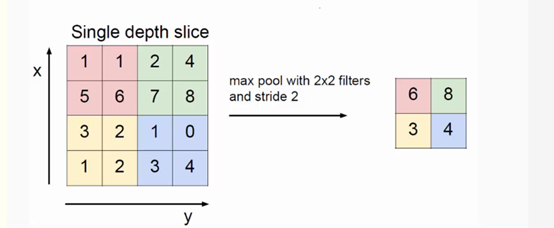

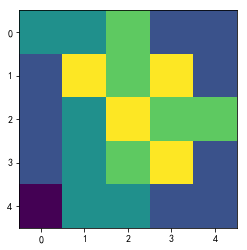

In [12]:
plt.imshow(res.reshape([5,5]))

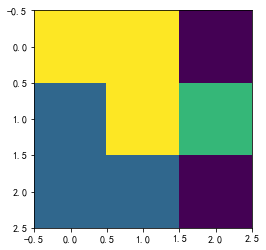

(1, 3, 3, 1)

In [28]:
with tf.Session() as sess:
    pool = sess.run(tf.nn.max_pool(res,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME'))
plt.imshow(pool.reshape([3,3]))
plt.show()
pool.shape

In [32]:
res.reshape(5,5)

array([[2., 2., 3., 1., 1.],
       [1., 4., 3., 4., 1.],
       [1., 2., 4., 3., 3.],
       [1., 2., 3., 4., 1.],
       [0., 2., 2., 1., 1.]])

In [33]:
pool.reshape(3,3)

array([[4., 4., 1.],
       [2., 4., 3.],
       [2., 2., 1.]])

池化的动力：压缩信息，少量的平移的近似不变性

这一层学得的函数必须具有对少量平移的不变性。当这个假设成立时，池化可以极大地提高网络的统计效率。

# 卷积神经网络的三种任务：

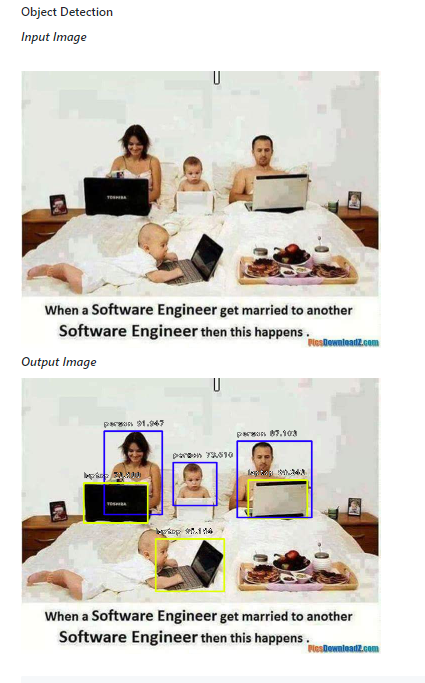

<img src="https://ask.qcloudimg.com/http-save/developer-news/lzn87u941s.gif" class="" style="cursor: zoom-in;">